In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [217]:
data=pd.read_csv('/content/Wine_clust.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [218]:
data.shape

(178, 13)

In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [220]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [221]:
 data.isnull().sum()
 #clean data

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

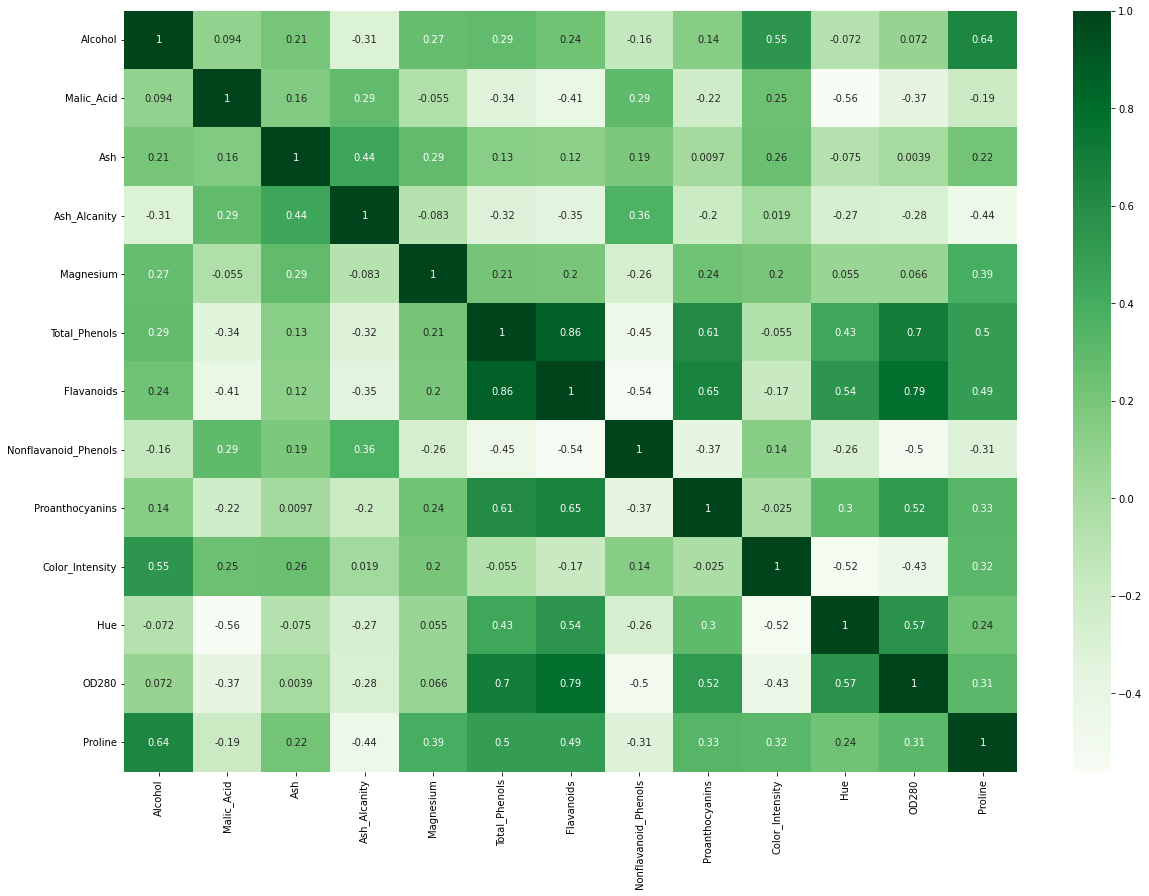

In [222]:
# Inspect feature correlations

plt.figure(figsize=(20,14))
ax = sns.heatmap(data.corr(), cmap='Greens', annot=True)
plt.show()

# Elbow method
-to find optimal value of k

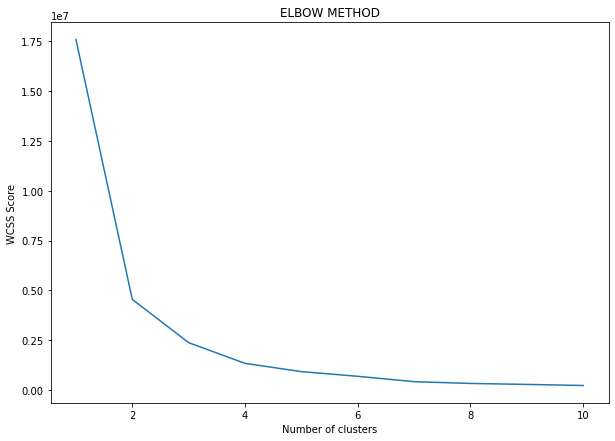

In [223]:
# Elbow method
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=101)
  km.fit(data)
  wcss.append(km.inertia_)

#plot wcss vs k
plt.figure(figsize=(10,7))
plt.plot(range(1,11),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS Score')
plt.show()    

In [224]:
#from the graph  we get optimal  k value as k=3

In [225]:

# Calculate Silhoutte Score

from sklearn.metrics import silhouette_score
score = silhouette_score(data, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.519


In [226]:
#Use silhouette score
range_n_clusters = list (range(3,8))
print ("Number of clusters from 2 to 9: \n", range_n_clusters)


for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(data)
    centers = clusterer.cluster_centers_

    score = silhouette_score(data, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

Number of clusters from 2 to 9: 
 [3, 4, 5, 6, 7]
For n_clusters = 3, silhouette score is 0.571138193786884)
For n_clusters = 4, silhouette score is 0.5620323449580346)
For n_clusters = 5, silhouette score is 0.5489993239795681)
For n_clusters = 6, silhouette score is 0.563875598112579)
For n_clusters = 7, silhouette score is 0.5616196384056887)


* If the score is 1, the cluster is dense and well-separated than other clusters. 
* A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighbouring clusters. 
* A negative score [-1, 0] indicate that the samples might have got assigned to the wrong clusters.

In [227]:

km=KMeans(n_clusters=3,init='k-means++',n_init=10,random_state=101)
km.fit(data)
data['km_3']=km.labels_
data


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,km_3
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [228]:
#if i want to see how clusters are formed for k varying from 3 to 7

for k in range(3,8):
  km=KMeans(n_clusters=k,init='k-means++',n_init=10,random_state=101)
  km.fit(data)
  data[f'km_{k}']=km.labels_

data.iloc[:,13:18]

,km_3,km_4,km_5,km_6,km_7
0,1,1,1,3,4
1,1,1,1,3,4
2,1,3,1,1,2
3,1,3,3,4,5
4,2,2,4,0,3
...,...,...,...,...,...
173,2,2,4,0,3
174,2,2,4,0,3
175,2,2,4,0,0
176,2,2,4,0,0


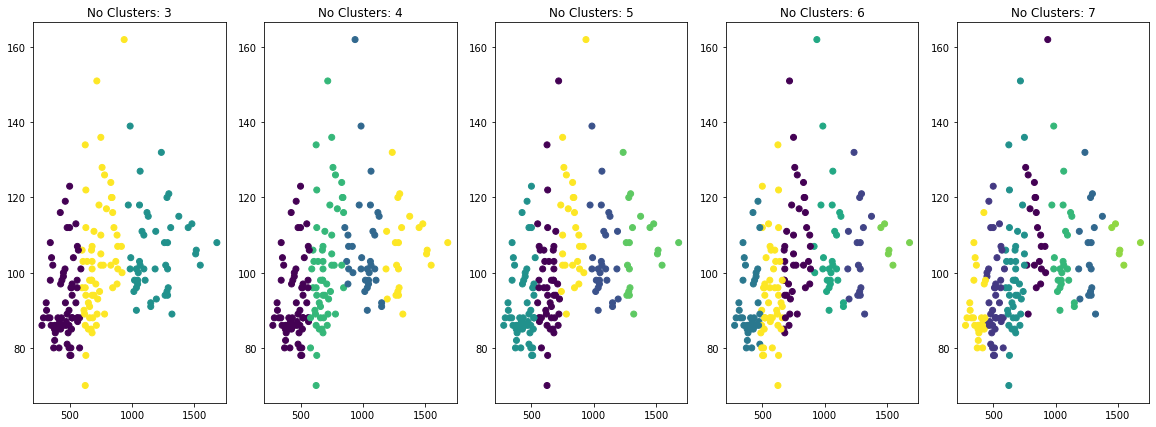

In [229]:
fig,axs=plt.subplots(nrows=1,ncols=5,figsize=(20,7))

for i,ax in enumerate(fig.axes,start=3):     
  ax.scatter(x=data['Proline'],y=data['Magnesium'],c=data[f'km_{i}'])
  ax.set_title(f'No Clusters: {i}')

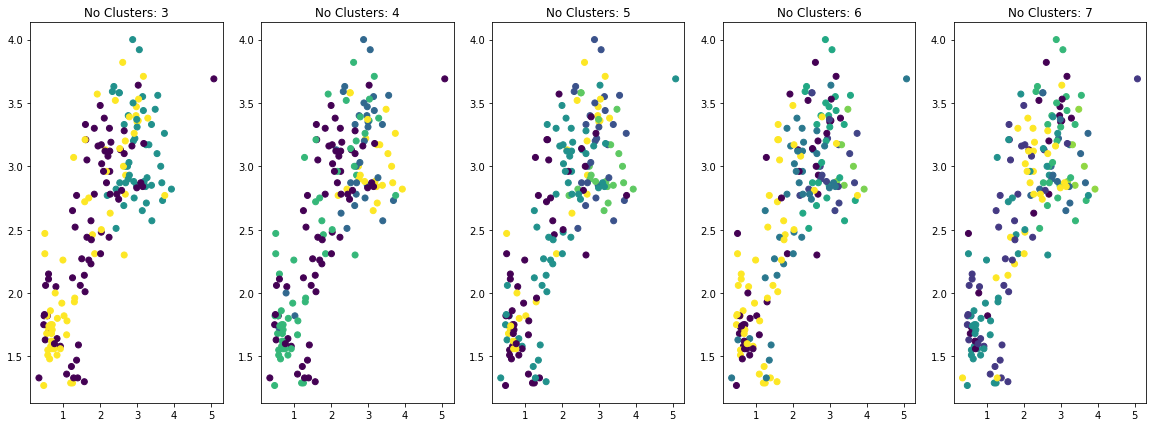

In [230]:
fig,axs=plt.subplots(nrows=1,ncols=5,figsize=(20,7))

for i,ax in enumerate(fig.axes,start=3):     
  ax.scatter(x=data['Flavanoids'],y=data['OD280'],c=data[f'km_{i}'])
  ax.set_title(f'No Clusters: {i}')

# Principal Component Analysis (PCA)

In [231]:
data=pd.read_csv('/content/Wine_clust.csv')

In [232]:
from sklearn.decomposition import PCA
pc=PCA()

In [233]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(
        np.sum(pca.explained_variance_ratio_)))

    

Explained variation per principal component: [0.99809123 0.00173592]
Cumulative variance explained by 2 principal components: 99.98%


In [234]:
# Results from pca.components_
dataset_pca = pd.DataFrame(abs(pca.components_), columns=data.columns, index=['PC_1', 'PC_2'])
print('\n\n', dataset_pca)
    
    



        Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
PC_1  0.001659    0.000681  0.000195      0.004671   0.017868       0.000990   
PC_2  0.001203    0.002155  0.004594      0.026450   0.999344       0.000878   

      Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
PC_1    0.001567              0.000123         0.000601         0.002327   
PC_2    0.000052              0.001354         0.005004         0.015100   

           Hue     OD280   Proline  
PC_1  0.000171  0.000705  0.999823  
PC_2  0.000763  0.003495  0.017774  


In [235]:
# Most important features 
print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.3].iloc[0]).dropna())
print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.3].iloc[1]).dropna())

As per PC 1:
 Proline    0.999823
Name: PC_1, dtype: float64


As per PC 2:
 Magnesium    0.999344
Name: PC_2, dtype: float64


In [236]:
pc_arr=pc.fit_transform(data)
trans_data=pd.DataFrame(pc_arr)
trans_data.corr().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0
1,0.0,1.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
2,-0.0,-0.0,1.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0
3,-0.0,0.0,0.0,1.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0
4,0.0,0.0,0.0,-0.0,1.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0
5,-0.0,0.0,-0.0,-0.0,0.0,1.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0
6,0.0,-0.0,-0.0,-0.0,0.0,-0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,1.0,0.0,-0.0,-0.0,-0.0,0.0
8,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.0
9,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,1.0,0.0,-0.0,0.0


In [237]:
from scipy.cluster.hierarchy import linkage,dendrogram  

<function matplotlib.pyplot.show(*args, **kw)>

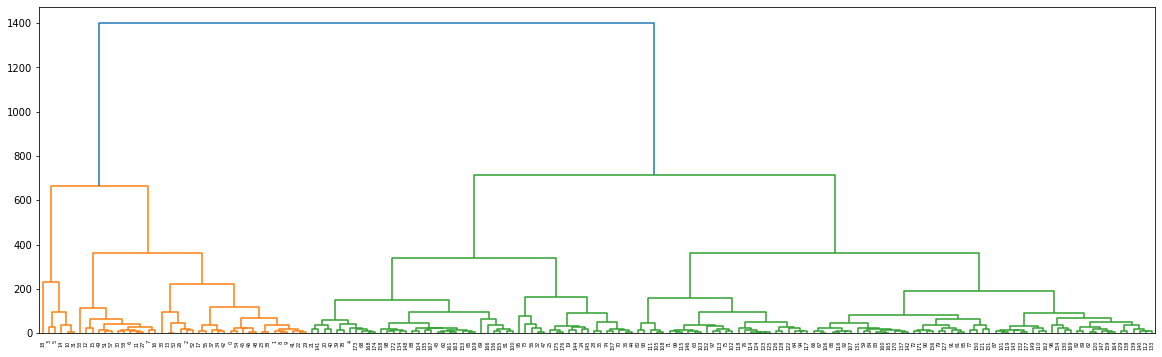

In [238]:
mergings=linkage(data, method='complete')
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
dendrogram(mergings,labels=data.index,leaf_rotation=90)
plt.show

In [239]:
from scipy.cluster.hierarchy import fcluster
labels=fcluster(mergings,11,criterion='distance')
pd.Series(labels).value_counts()


46    4
77    4
86    4
11    3
72    3
     ..
30    1
61    1
58    1
49    1
98    1
Length: 117, dtype: int64

# DBSCAN clustering algorithm


In [240]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(data)

DBSCAN()

In [241]:
data['DBSCAN_labels']=dbscan.labels_ 
dbscan_opt=DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(data)

DBSCAN(eps=30, min_samples=6)

In [242]:
data['DBSCAN_opt_labels']=dbscan_opt.labels_
data['DBSCAN_opt_labels'].value_counts()

 1    113
-1     23
 0     17
 3     13
 2     12
Name: DBSCAN_opt_labels, dtype: int64

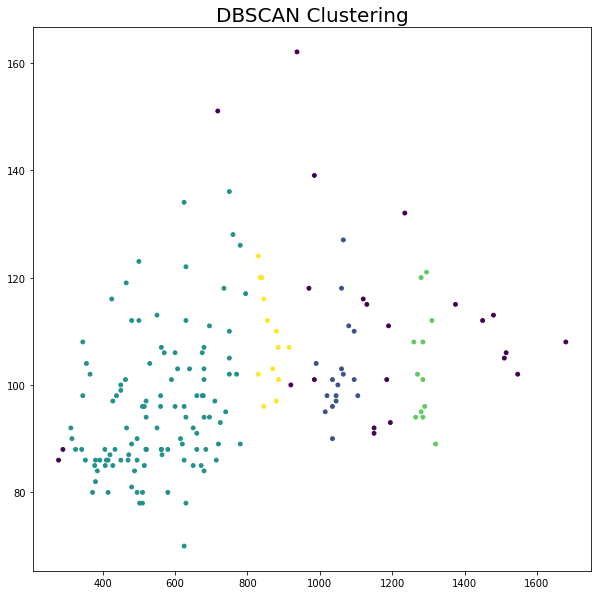

In [245]:
# Plotting the resulting clusters

plt.figure(figsize=(10,10))
plt.scatter(data['Proline'],data['Magnesium'],c=data['DBSCAN_opt_labels'],s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.show()